In [71]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import mnist

In [72]:
#import the MNIST dataset at first
mnist = tf.keras.datasets.mnist
# we have training set and test set
(xt, yt),(xtest,ytest) = mnist.load_data()

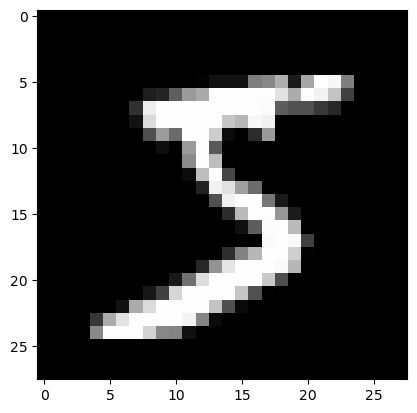

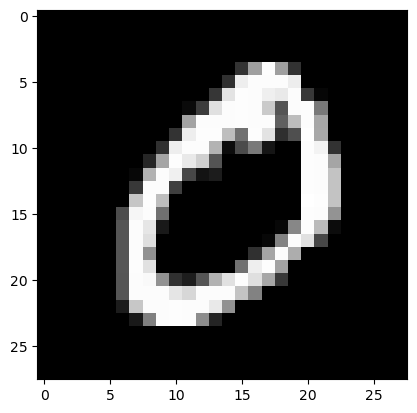

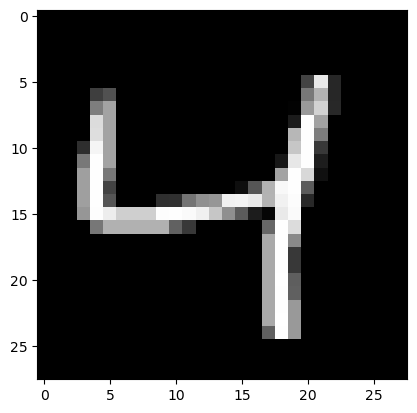

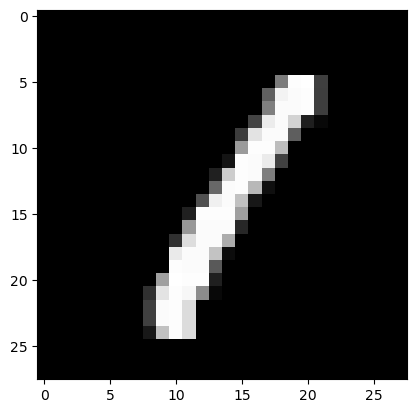

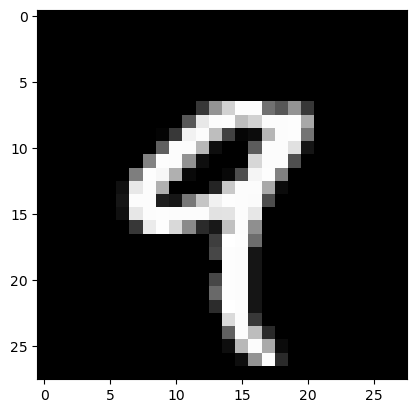

In [73]:
#get image and process image, get a good look at the first 5 images in a black and white gradient
for i in range(0,5):
    plt.imshow(xt[i], cmap='gray')
    plt.show()


In [74]:
print(yt[0])

5


In [76]:
#convert everything from 0 to 1
xt = tf.keras.utils.normalize(xt, axis=1)
xtest = tf.keras.utils.normalize(xtest, axis=1)

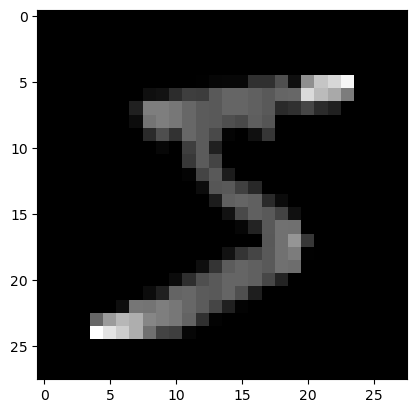

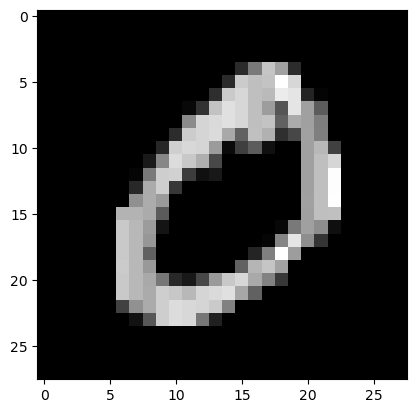

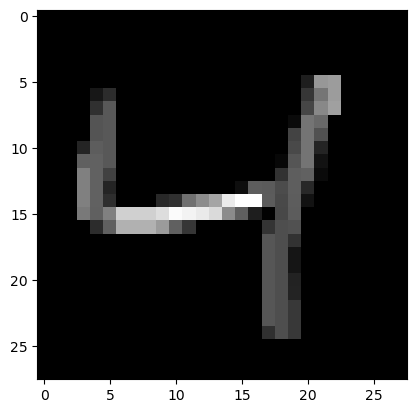

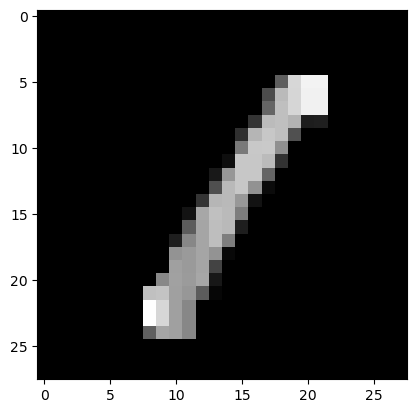

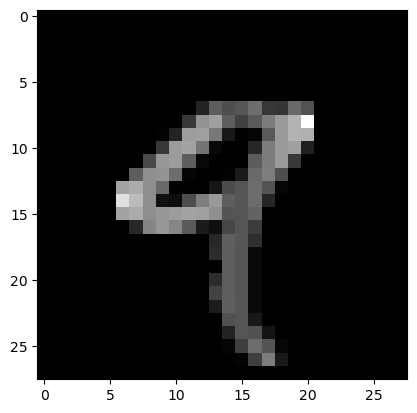

In [77]:
for i in range(0,5):
    plt.imshow(xt[i], cmap="gray")
    plt.show()

In [78]:
print(xt[0])

[[0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.02
  0.03 0.03 0.17 0.18 0.29 0.06 0.52 0.72 0.78 0.89 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.06 0.07 0.16 0.23 0.22 0.33
  0.37 0.37 0.35 0.33 0.37 0.37 0.79 0.68 0.61 0.45 0.00 0

In [79]:
# do SVD in the data set
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier


In [81]:
xtt=[]
for x in xt:
    u, s, t = np.linalg.svd(x)
    ss = np.zeros((x.shape[0], x.shape[1]))
    ss[:x.shape[0], :x.shape[0]] = np.diag(s)
    
    # dimension
    nd = 2
    ss = ss[:, :nd]
    vt = t[:nd, :]

    # construction of the a matrix
    test = u.dot(ss.dot(vt))
    xtt.append(test)


In [92]:
print(len(xtt[1]))
print(len(xt[1]))

28
28


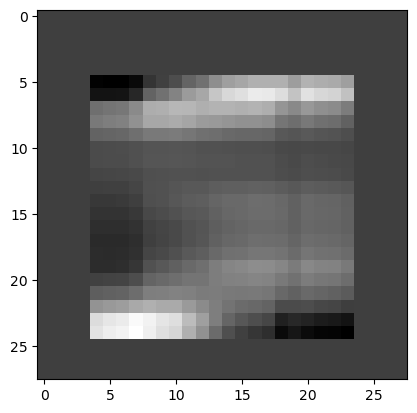

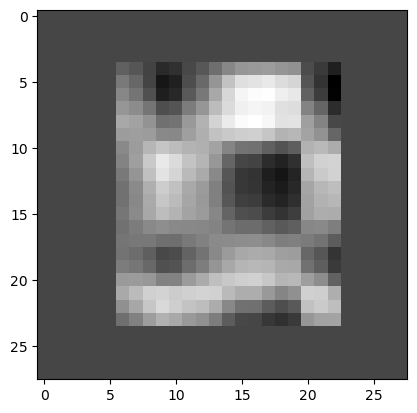

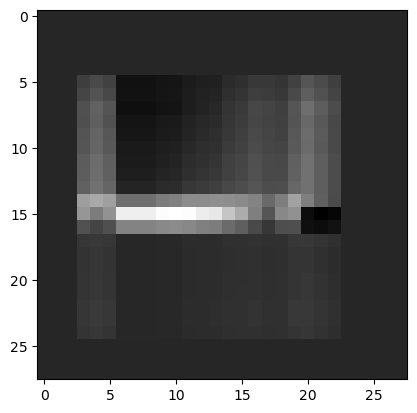

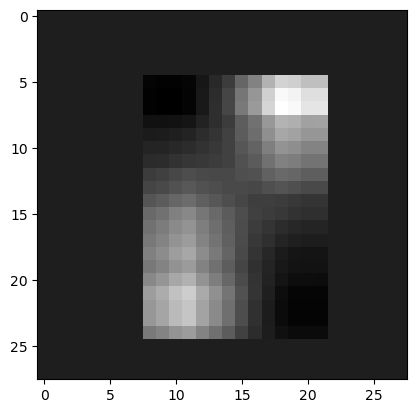

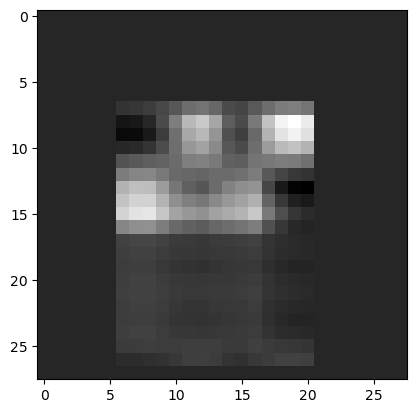

In [93]:
#testing the svd 
for i in range(0,5):
    plt.imshow(xtt[i], cmap='gray')
    plt.show()

In [94]:
# construct a keras model object
nn = tf.keras.models.Sequential()

# Flatten the matrices
flat = tf.keras.layers.Flatten()
nn.add(flat)

# Use input and all other hidden layers
hidden = tf.keras.layers.Dense(200, activation=tf.nn.relu)
nn.add(hidden)
nn.add(hidden)

# output layer of nn
output = tf.keras.layers.Dense(10, activation=tf.nn.softmax)
nn.add(output)

#compile the neural network
nn.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [102]:
#train the neural network using 6 epochs
yt = tf.stack(yt)
xtt = tf.stack(xtt)

nn.fit(x=xtt, y=yt, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0733 - accuracy: 0.9771
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0267 - accuracy: 0.9904
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0179 - accuracy: 0.9936
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0151 - accuracy: 0.9947
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0131 - accuracy: 0.9955


In [104]:
# Test our model's performance
testLoss, testAccuracy = nn.evaluate(x=xtest, y=ytest)
# Accuracy
print('\nTest accuracy:', testAccuracy)

313/313 [==============================] - 2s 2ms/step - loss: 0.2420 - accuracy: 0.9676

Test accuracy: 0.9675999879837036


313/313 [==============================] - 1s 2ms/step


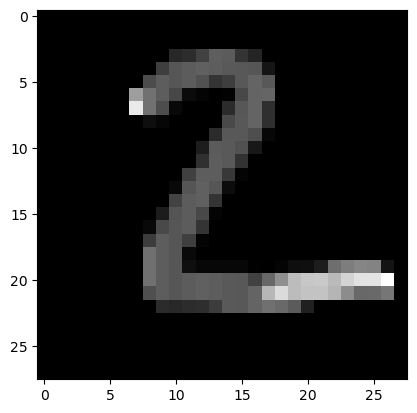

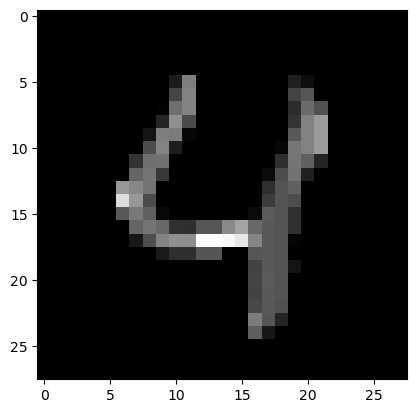

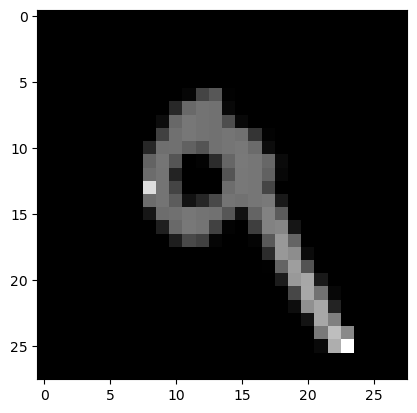

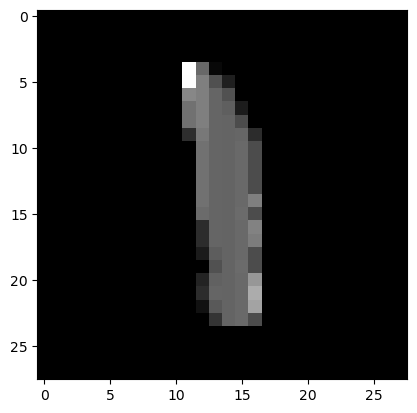

In [107]:
predict = nn.predict([xtest]) # Make prediction
#lets predict the 1, 4, 7, and 777's image
plt.imshow(xtest[1], cmap="gray")
plt.show()
plt.imshow(xtest[4], cmap="gray")
plt.show()
plt.imshow(xtest[7], cmap="gray")
plt.show()
plt.imshow(xtest[777], cmap="gray")
plt.show()

In [108]:
print(np.argmax(predict[1]))
print(np.argmax(predict[4]))
print(np.argmax(predict[7]))
print(np.argmax(predict[777]))

2
4
9
1


In [109]:
# we can see that our model has succesfully predicted these numbers 

In [111]:
# now lets contrast this to the result we have without using SVD
# construct a keras model object
newnn = tf.keras.models.Sequential()

# Flatten the matrices
flat = tf.keras.layers.Flatten()
newnn.add(flat)

# Use input and all other hidden layers
hidden = tf.keras.layers.Dense(168, activation=tf.nn.relu)
newnn.add(hidden)
newnn.add(hidden)

# output layer of nn
output = tf.keras.layers.Dense(10, activation=tf.nn.softmax)
newnn.add(output)

#compile the neural network
newnn.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [113]:
yt = tf.stack(yt)
xt = tf.stack(xtt)

newnn.fit(x=xt, y=yt, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4126 - accuracy: 0.8780
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2261 - accuracy: 0.9294
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1788 - accuracy: 0.9434
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1526 - accuracy: 0.9512
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1353 - accuracy: 0.9567


In [114]:
testLoss, testAccuracy = newnn.evaluate(x=xtest, y=ytest)
# Accuracy
print('\nTest accuracy:', testAccuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1615 - accuracy: 0.9527

Test accuracy: 0.9527000188827515


In [115]:
#as you can see, the test accuracy of the new NN model without the SVD is lower than with SVD

313/313 [==============================] - 1s 2ms/step


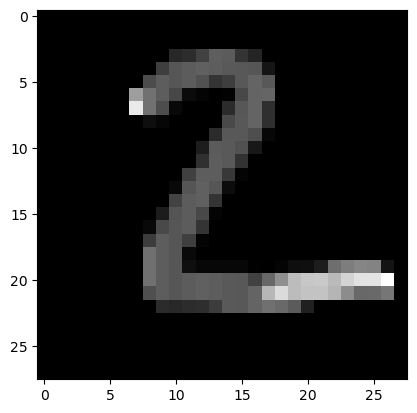

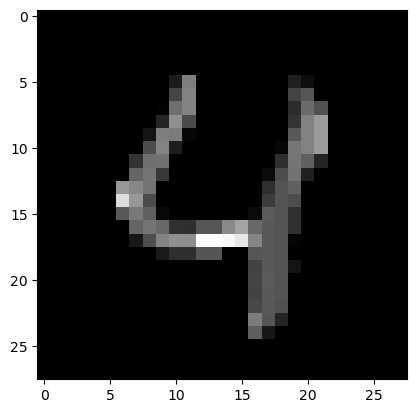

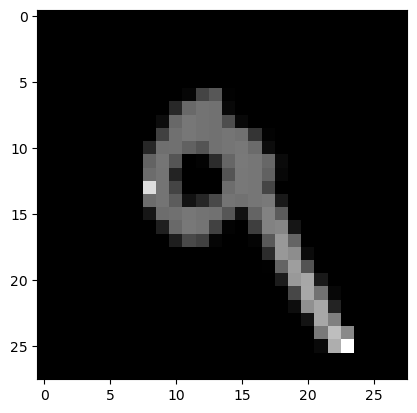

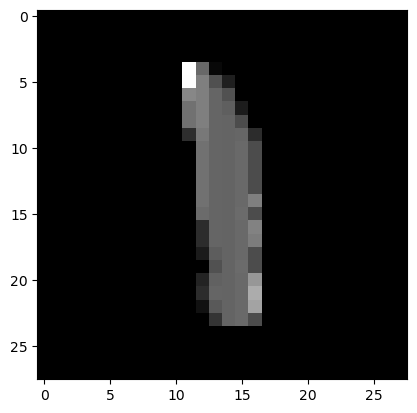

In [116]:
predict = nn.predict([xtest]) # Make prediction
#lets predict the 1, 4, 7, and 777's image
plt.imshow(xtest[1], cmap="gray")
plt.show()
plt.imshow(xtest[4], cmap="gray")
plt.show()
plt.imshow(xtest[7], cmap="gray")
plt.show()
plt.imshow(xtest[777], cmap="gray")
plt.show()

In [117]:
print(np.argmax(predict[1]))
print(np.argmax(predict[4]))
print(np.argmax(predict[7]))
print(np.argmax(predict[777]))

2
4
9
1


In [118]:
# still managed to predict these characters though :)